In [226]:
import pandas as pd
import numpy as np
df = pd.read_csv('pageblock.csv')
df = df.sort_values(by='class')
df = df.reset_index(drop=True)
df.head()

,height,length,area,eccentricity,p_black,p_and,mean_tr,blackpix,blackand,web_trans,class
0,163,161,26243,0.988,0.523,0.897,8.40,13725,23547,1634,graphic
1,174,471,81954,2.707,0.339,0.433,15.84,27820,35499,1756,graphic
2,72,96,6912,1.333,0.488,0.582,15.69,3374,4025,215,graphic
3,128,347,44416,2.711,0.399,0.567,13.07,17721,25163,1356,graphic
4,186,469,87234,2.522,0.378,0.529,22.29,33017,46133,1481,graphic


In [233]:
y = df.iloc[28:470, 10].values
y = np.where(y == 'horizontal line', -1, 1)
X = df.iloc[28:470, [3,9]].values
X=(X-X.mean())/X.std()
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [234]:
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

In [235]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X = np.vstack(X_train)
y = np.hstack(y_train)

In [236]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier,test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
        alpha=0.9, c=cmap(idx),
        marker=markers[idx], label=cl)
        # highlight test samples
        if test_idx:
            X_test, y_test = X[test_idx, :], y[test_idx]
            plt.scatter(X_test[:, 0], X_test[:, 1], c='',
            alpha=1.0, linewidth=1, marker='o',
            s=55, label='test set')

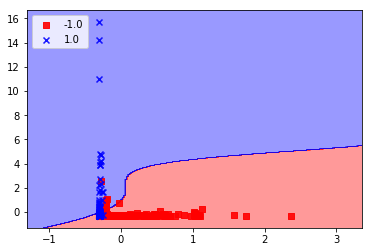

In [237]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
svm = SVC(kernel='rbf', random_state=0,gamma=0.1,C=10.0)
svm.fit(X,y.astype(float))
plot_decision_regions(X.astype(float), y.astype(float), classifier=svm)
plt.legend(loc='upper left')
plt.show()

In [238]:
y_train_pred = svm.predict(X)
acc = np.sum(y== y_train_pred, axis=0) / X.shape[0]
print('Training accuracy: %.2f%%' % (acc * 100))

Training accuracy: 82.72%


In [239]:
y_test_pred = svm.predict(X_test)
acc1 = np.sum(y_test == y_test_pred, axis=0) / X_test.shape[0]
print('Testing accuracy: %.2f%%' % (acc1 * 100))

Testing accuracy: 85.39%
